In [1]:
# Загрузка данных
import pandas as pd
data = pd.read_csv("../2/melbourne_housing.csv")

In [2]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

columns_and_types = {
  "Rooms": np.int64,
  "Type": None,
  "Price": np.int64,
  "Distance": np.float64,
  "Postcode": np.int64,
  "Bedroom2": np.int64,
  "Bathroom": np.int64,
  "Car": np.int64,
  "Landsize": np.float64,
  "BuildingArea": np.float64,
  "YearBuilt": np.int64,
  "Lattitude": np.float64,
  "Longtitude": np.float64,
  "Propertycount": np.int64,
}

data = data[list(columns_and_types.keys())]
data.dropna(axis=0, how='any', inplace=True)
data = data.astype({k: v for k,v in columns_and_types.items() if v is not None})

type_encoder = LabelEncoder()
data["Type"] = type_encoder.fit_transform(data["Type"])

In [3]:
from sklearn.preprocessing import MinMaxScaler

sc2 = MinMaxScaler()
for col in data.columns:
  data[col] = sc2.fit_transform(data[[col]])
  
display(data.head())

,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
2,0.090909,0.0,0.101928,0.052743,0.068577,0.166667,0.000,0.0,0.003645,0.025386,0.855407,0.477684,0.516625,0.17616
4,0.181818,0.0,0.150412,0.052743,0.068577,0.250000,0.125,0.0,0.003131,0.048201,0.855407,0.475859,0.517532,0.17616
6,0.272727,0.0,0.165633,0.052743,0.068577,0.250000,0.000,0.2,0.002804,0.045630,0.993925,0.478596,0.517260,0.17616
11,0.181818,0.0,0.196753,0.052743,0.068577,0.333333,0.125,0.0,0.005724,0.067481,0.867558,0.484853,0.521976,0.17616
14,0.090909,0.0,0.169692,0.052743,0.068577,0.166667,0.000,0.2,0.005981,0.034383,0.843256,0.480161,0.518439,0.17616


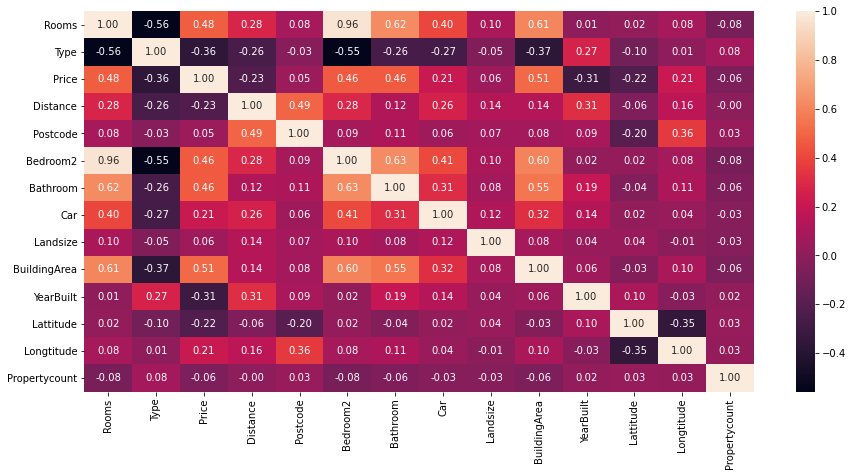

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method="pearson"), ax=ax, annot=True, fmt='.2f');

In [5]:
from sklearn.model_selection import train_test_split

data_X = data.loc[
  :,
  [
    "BuildingArea",
    "Bathroom",
    "Bedroom2",
    "Rooms",
    "Longtitude",
  ]
]

data_Y = data.loc[:, "Price"]
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
  data_X,
  data_Y,
  test_size=0.2,
  random_state=1
)

In [6]:
from sklearn.ensemble import BaggingRegressor

bc1 = BaggingRegressor(
  n_estimators=30,
  oob_score=True,
  random_state=10,
)
bc1.fit(data_X_train, data_y_train)

BaggingRegressor(n_estimators=30, oob_score=True, random_state=10)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

bc1_y_test_predict = bc1.predict(data_X_test)
(data_y_test, bc1_y_test_predict), \
  mean_squared_error(data_y_test, bc1_y_test_predict)

((17359    0.068666
  17097    0.049724
  5265     0.348856
  21286    0.055812
  9450     0.081069
             ...   
  31695    0.222009
  21217    0.152103
  13222    0.057391
  33191    0.120532
  14459    0.045552
  Name: Price, Length: 1778, dtype: float64,
  array([0.12094562, 0.10117262, 0.231954  , ..., 0.03338595, 0.11583042,
         0.04548051])),
 0.0029685594057191618)

In [8]:
from sklearn.ensemble import RandomForestRegressor

tree1 = RandomForestRegressor(
  n_estimators=30,
  oob_score=True,
  random_state=10,
)
tree1.fit(data_X_train, data_y_train)

RandomForestRegressor(n_estimators=30, oob_score=True, random_state=10)

In [9]:
tree1_y_test_predict = tree1.predict(data_X_test)
mean_absolute_error(data_y_test, tree1_y_test_predict), \
  mean_squared_error(data_y_test, tree1_y_test_predict)

(0.035491162175492204, 0.002970702962023411)

In [10]:
from sklearn.ensemble import AdaBoostRegressor

ab1 = AdaBoostRegressor(
  n_estimators=30,
  random_state=10
)
ab1.fit(data_X_train, data_y_train)

AdaBoostRegressor(n_estimators=30, random_state=10)

In [11]:
ab1_y_test_predict = ab1.predict(data_X_test)
mean_absolute_error(data_y_test, ab1_y_test_predict), \
  mean_squared_error(data_y_test, ab1_y_test_predict)

(0.052759641970190264, 0.004445107849674166)

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

gb1 = GradientBoostingRegressor(random_state=10)
gb1.fit(data_X_train, data_y_train)

GradientBoostingRegressor(random_state=10)

In [13]:
gb1_y_test_predict = gb1.predict(data_X_test)
mean_absolute_error(data_y_test, gb1_y_test_predict), \
  mean_squared_error(data_y_test, gb1_y_test_predict)

(0.03393125035646352, 0.0027690332443290728)